<a href="https://colab.research.google.com/github/Masterak25/DL_AK/blob/main/CIFAR_10_Photo_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as ply 
import cufflinks as cf 
import warnings 
warnings.filterwarnings('ignore')

# Import and load the dataset

In [2]:
from keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


# print shape of each variable

In [4]:
print("train image shape:",x_train.shape)

train image shape: (50000, 32, 32, 3)


In [5]:
print("train label shape:",y_train.shape)

train label shape: (50000, 1)


In [6]:
print("test image shape:",x_test.shape)

test image shape: (10000, 32, 32, 3)


In [7]:
print("test label shape:",y_test.shape)

test label shape: (10000, 1)


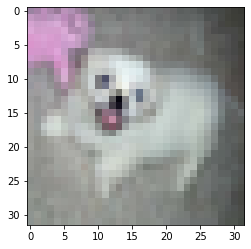

In [8]:
plt.imshow(x_train[7000])

In [9]:
y_train[7000]

array([5], dtype=uint8)

# rescaling it to [0,1] range

In [10]:
# convert to float 
x_train=x_train.astype('float32') 
x_test=x_test.astype('float32')

First we need to convert the integer values of pixel to float and then divide the pixel values by the maximum pixel value i.e 255

In [11]:
# divide by max value 255 
x_train=x_train/225.0 
x_test=x_test/255.0

one hot encoding to convert this integer value into a 10 channel one hot vector using to_categorical() utility function

In [12]:
#one hot encoding of labels 
from keras.utils import np_utils 
y_train=np_utils.to_categorical(y_train,10) 
y_test=np_utils.to_categorical(y_test,10)

In [13]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In cifar-10 dataset the images are stored in a 4 dimensional array which is in accordance with the input shape required for 2D convolution operation in Keras, hence there is no need to reshape the images.

# CNN model

In [14]:
from keras.models import Sequential 
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D

In [15]:
model=Sequential()

In [16]:
model.add(Conv2D(64,kernel_size=3,activation="relu",input_shape=(32,32,3))) 
model.add(Conv2D(32,kernel_size=3,activation='relu'))

In [17]:
model.add(MaxPooling2D(pool_size=2))

In [18]:
model.add(Flatten()) 
model.add(Dense(200,activation='relu')) 
model.add(Dense(100,activation='relu')) 
model.add(Dense(50,activation='relu')) 
model.add(Dense(25,activation='relu'))

In [19]:
model.add(Dense(10,activation='softmax'))

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model1=model.fit(x_train,y_train,epochs=10,verbose=1) 
model1

Epoch 1/10
500/500 [==============================] - 163s 325ms/step - loss: 0.9396 - accuracy: 0.6685
Epoch 2/10
500/500 [==============================] - 163s 326ms/step - loss: 0.8361 - accuracy: 0.7047
Epoch 3/10
500/500 [==============================] - 163s 326ms/step - loss: 0.7362 - accuracy: 0.7417
Epoch 4/10
500/500 [==============================] - 163s 325ms/step - loss: 0.6312 - accuracy: 0.7805
Epoch 5/10
500/500 [==============================] - 163s 325ms/step - loss: 0.5415 - accuracy: 0.8102
Epoch 6/10
500/500 [==============================] - 162s 324ms/step - loss: 0.4377 - accuracy: 0.8479
Epoch 7/10
500/500 [==============================] - 162s 325ms/step - loss: 0.3509 - accuracy: 0.8796
Epoch 8/10
500/500 [==============================] - 162s 325ms/step - loss: 0.2769 - accuracy: 0.9038
Epoch 9/10
500/500 [==============================] - 162s 324ms/step - loss: 0.2197 - accuracy: 0.9251
Epoch 10/10
500/500 [==============================] - 162s 324m

In [23]:
y_pred=model.predict(x_test[0:9])

In [24]:
y_true_cls = np.argmax(y_test[0:9], axis=1)

In [25]:
y_pred_cls = np.argmax(y_pred, axis=1)

In [26]:
cls_labels =["airoplane", "automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

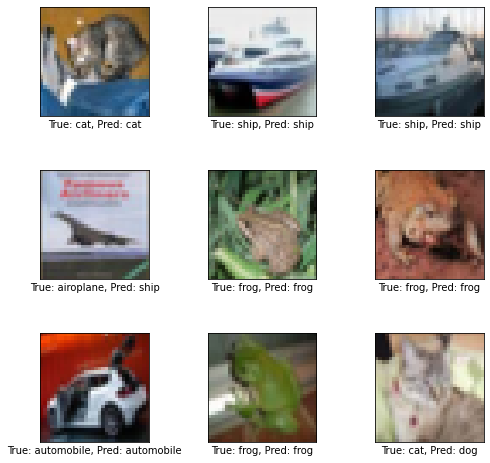

In [28]:
fig, axes = plt.subplots(3, 3, figsize=(8,8)) 
fig.subplots_adjust(hspace=0.5, wspace=0.5) 
for i, ax in enumerate(axes.flat): 
  ax.imshow(x_test[i]) 
  xlabel = "True: {0}, Pred: {1}".format(cls_labels[y_true_cls[i]], cls_labels[y_pred_cls[i]]) 
  ax.set_xlabel(xlabel) 
  ax.set_xticks([]) 
  ax.set_yticks([]) 
plt.show()

In [29]:
y_pred[2]

array([4.16508736e-03, 1.37624293e-05, 2.04463322e-06, 4.79757318e-08,
       4.20641975e-08, 2.36292830e-09, 3.26006044e-09, 2.97171958e-08,
       9.95807886e-01, 1.10846295e-05], dtype=float32)

In [30]:
np.argmax(y_pred[2])

8

In [34]:
y_test[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [32]:
score=model.evaluate(x_test,y_test, verbose = 0)

In [33]:
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 1.5344148874282837
Test accuracy: 0.6638000011444092


In [35]:
y_pred=model.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
y_true_cls1 = np.argmax(y_test, axis=1)

In [38]:
y_pred_cls1 = np.argmax(y_pred, axis=1)

In [39]:
cm=confusion_matrix(y_true_cls1, y_pred_cls1)

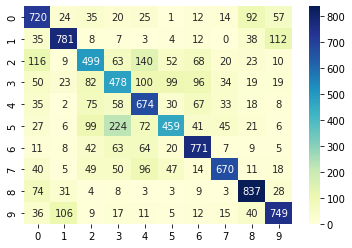

In [40]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g');

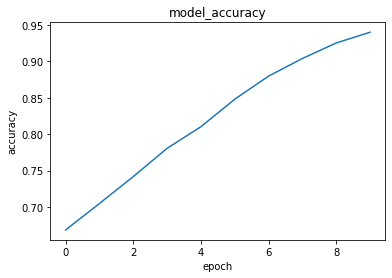

In [42]:
plt.plot(model1.history['accuracy']) 
plt.title("model_accuracy") 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.show()

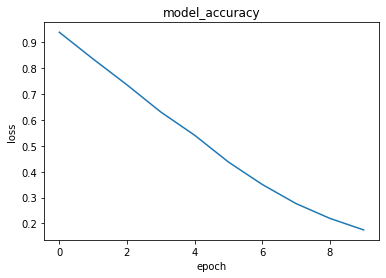

In [44]:
plt.plot(model1.history['loss']) 
plt.title("model_accuracy") 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.show()